# Image Augmentation with Keras

In [1]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


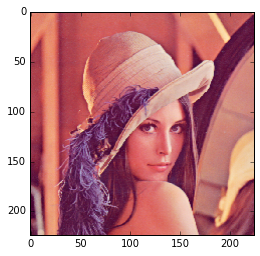

In [2]:
lena = image.load_img("../data/lena.png", target_size=(224, 224))
plt.imshow(lena)

In [3]:
x = image.img_to_array(lena)
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [4]:
datagen = image.ImageDataGenerator(featurewise_center=False,
                                  featurewise_std_normalization=False,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)
datagen.fit(x)

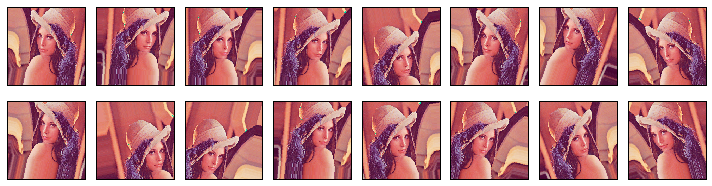

In [5]:
fig, axes = plt.subplots(2, 8, figsize=(10, 3))
axes = np.ravel(axes)
num_augmented = 0
for x_aug in datagen.flow(x, batch_size=1):
    if num_augmented >= 16:
        break
    x_aug = 255 - x_aug
    axes[num_augmented].imshow(x_aug[0], interpolation="nearest")
    axes[num_augmented].set_xticks([])
    axes[num_augmented].set_yticks([])
    num_augmented += 1
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()